In [258]:
# -*- coding: utf-8 -*-

In [350]:
%config IPCompleter.greedy=True

In [1]:
from graphviz import Digraph  # fluxogram
from os.path import abspath as abs  # path
import lxml.etree as ET  # XML parser
from os.path import abspath
from os import listdir
import re as regex

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [3]:
folder_project = abspath('') + '/'

---

# 1. Obtendo o xml de áreas

In [4]:
root = ET.parse(folder_project + 'doc/Competencia_disciplina.xml').getroot()

In [5]:
dict_area = {}
comp_names= []

In [6]:
gridNumber = root.find('grade_referencia').text

In [7]:
gridNumber = regex.sub('[\W]', '', gridNumber)

In [8]:
for i in root.findall('.//competencia'):
    comp = (i.find('nome').text)
    for sigla in i.findall('.//sigla'):
        if not sigla.text:
            continue
        dict_area[sigla.text] = comp
    comp_names.append(comp)

---

# 2. Obtendo o xml de um aluno em específico

In [9]:
ra = '2016001942'

In [10]:
root = ET.parse(folder_project + 'xml_files/historico_' + ra + '.xml').getroot()

---
# 3. Fazendo manipulações

In [11]:
dict_materia = {}

In [12]:
dict_count_materia = {}

In [13]:
for i in root.findall('.//Disciplina'): 
    nota = i.find('Nota').text
    if nota.find('-') != -1: continue # pula as matérias em andamento
    dict_materia[i.find('Sigla').text] = 0
    dict_count_materia[i.find('Sigla').text] = 0

In [14]:
for i in root.findall('.//Disciplina'): 
    nota = i.find('Nota').text
    sigla = i.find('Sigla').text
    if nota.find('-') != -1: continue # pula as matérias em andamento
    dict_materia[i.find('Sigla').text] += float(nota.replace(',','.'))
    dict_count_materia[i.find('Sigla').text] += 1

In [15]:
for i in dict_materia:
    dict_materia[i] /= dict_count_materia[i]
    dict_materia[i] = round(dict_materia[i],2)

In [16]:
dict_area_materia = {}

---
# 4. Fazendo a média dos dados

In [17]:
for i in comp_names:
    aux  = [ dict_materia[key] for key in dict_area if dict_area[key]==i and key in dict_materia]
    soma = sum(aux)
    cont = len(aux)
    
    dict_area_materia[i] = soma/cont if cont>0 else soma
        

---
# 5. Plot configs

In [18]:
objects = tuple(comp_names)

In [19]:
y_pos = np.arange(len(comp_names))

In [20]:
performance = [dict_area_materia[i] for i in dict_area_materia]

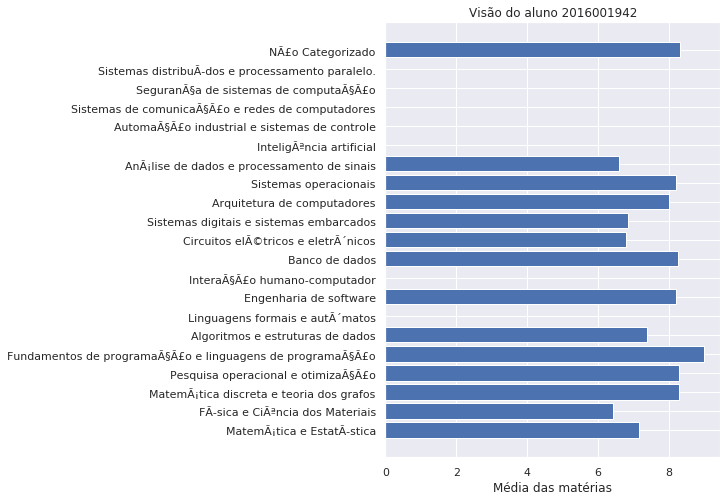

In [23]:
plt.figure(figsize=(6,8))
plt.barh(y_pos, performance, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Média das matérias')
plt.title('Visão do aluno 2016001942')
plt.show()

----
----
----

# Dados dos alunos

In [624]:
_folder_project = abspath('') + '/'
_folder_temp = _folder_project + 'xml_files/'

# get all histories in xml folder
histories = [i for i in listdir(
_folder_temp) if regex.match('[historico_]', i)]

In [625]:
dict_materia2 = {}
dict_count_materia2 = {}

In [627]:
for aluno in histories:
    root = ET.parse(folder_project + 'xml_files/' + aluno).getroot()
    for i in root.findall('.//Disciplina'): 
        nota = i.find('Nota').text
        sigla = i.find('Sigla').text
        if nota.find('--') != -1: continue # Find value
        dict_materia2[sigla] = 0
        dict_count_materia2[sigla] = 0
        
    for i in root.findall('.//Disciplina'): 
        nota = i.find('Nota').text
        sigla = i.find('Sigla').text
        if nota.find('-') != -1: continue # pula as matérias em andamento
        dict_materia2[i.find('Sigla').text] += float(nota.replace(',','.'))
        dict_count_materia2[i.find('Sigla').text] += 1

In [633]:
for i in dict_materia2:
    dict_materia2[i] /= dict_count_materia2[i]
    dict_materia2[i] = round(dict_materia2[i],2)

In [635]:
dict_area_materia2 = {}

In [637]:
for i in comp_names:
    aux  = [ dict_materia2[key] for key in dict_area if dict_area[key]==i and key in dict_materia2]
    soma = sum(aux)
    cont = len(aux)
    
    dict_area_materia2[i] = soma/cont if cont>0 else soma
        

In [638]:
performance2 = [dict_area_materia2[i] for i in dict_area_materia]

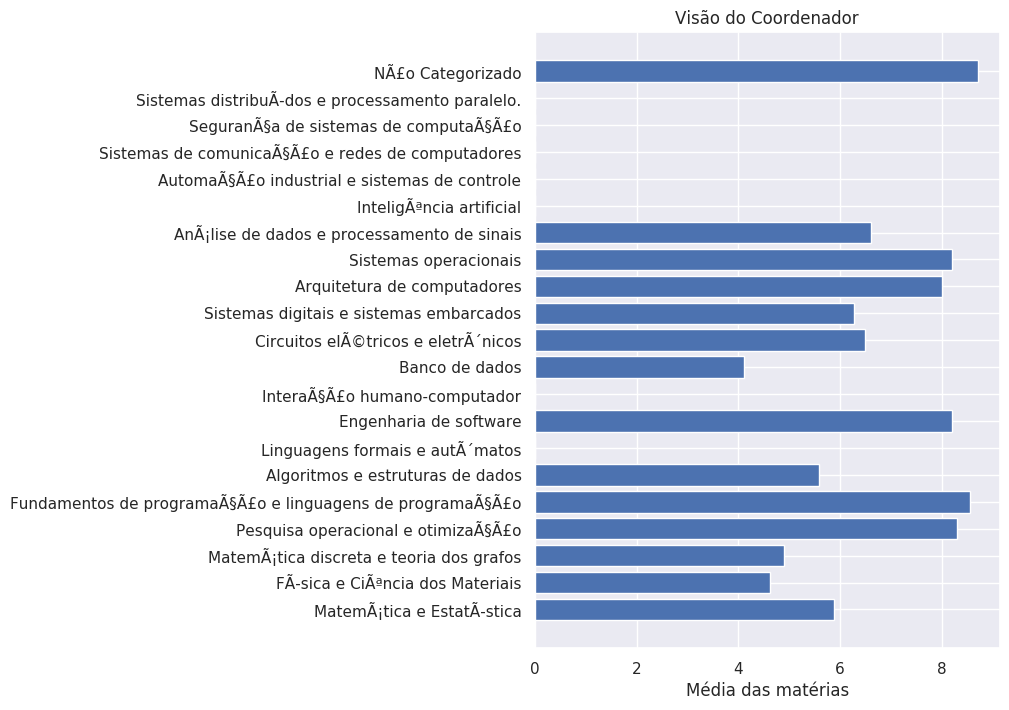

In [641]:
plt.figure(figsize=(6,8))
plt.barh(y_pos, performance2, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Média das matérias')
plt.title('Visão do Coordenador')
plt.show()